# Observations and Insights

In [1]:
#import library dependencies and setup file
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from scipy.stats import linregress


#research study files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

#read research data to analyze the study results
mouse_data = pd.read_csv(mouse_metadata)
results = pd.read_csv(study_results)

#Combine the data tables into a single dataset
pyarm_data = pd.merge(mouse_data, results, how="left", on=["Mouse ID","Mouse ID"])

In [2]:
pyarm_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#Calculate the number of mice in the DataFrame
mice = len(pyarm_data["Mouse ID"].unique())

In [4]:
mice

249

In [5]:
#Calculate the duplicate mice by ID number that shows up for Mouse ID and Timepoint
timepoints = pyarm_data["Mouse ID"].count()

In [6]:
timepoints

1893

In [7]:
#Find all the data for the duplicate mouse ID
duplicate = pyarm_data.loc[pyarm_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [8]:
duplicate

array(['g989'], dtype=object)

In [9]:
#Build DataFrame by dropping the duplicate mouse by its ID
study = pyarm_data[pyarm_data['Mouse ID'].isin(duplicate)==False]

In [10]:
study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
#Find the number of mice in the clean DataFrame
micecount = study["Mouse ID"].count()

In [12]:
micecount

1880

## Summary Statistics

In [13]:
#Calculalte and place mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_summary = study.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)','mean'),
                                                  Median=('Tumor Volume (mm3)','median'),
                                                  Variance=('Tumor Volume (mm3)','var'),
                                                  StandardDeviation=('Tumor Volume (mm3)','std'),
                                                  SEM=('Tumor Volume (mm3)','sem'))

#rename column and update format of summary statistics table
study_summary.rename(columns={'StandardDeviation':'Standard Deviation'}).style.set_properties(**{'text-align':'left'})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

In [18]:
zero = study[study['Timepoint'] == "0"].groupby('Drug Regimen').count()["Mouse ID"]
five = study[study['Timepoint'] == " 5"].groupby('Drug Regimen').count()["Mouse ID"]
ten = study[study['Timepoint'] == "10"].groupby('Drug Regimen').count()["Mouse ID"]
fifteen = study[study['Timepoint'] == "15"].groupby('Drug Regimen').count()['Mouse ID']
twenty = study[study['Timepoint'] == "20"].groupby('Drug Regimen').count()['Mouse ID']
twentyfive = study[study['Timepoint'] == "25"].groupby('Drug Regimen').count()['Mouse ID']
thirty = study[study['Timepoint'] == "30"].groupby('Drug Regimen').count()['Mouse ID']
thirtyfive = study[study['Timepoint'] == "35"].groupby('Drug Regimen').count()['Mouse ID']
forty = study[study['Timepoint'] == "40"].groupby('Drug Regimen').count()['Mouse ID']
fortyfive = study[study['Timepoint'] == "45"].groupby('Drug Regimen').count()['Mouse ID']

In [19]:
bar = pd.DataFrame({"0":zero,"5":five,"10":ten,"15":fifteen,"20":twenty,"25":twentyfive,"30":thirty,"35":thirtyfive,"40":forty,"45":fortyfive})

In [20]:
bar

,0,5,10,15,20,25,30,35,40,45
Drug Regimen,,,,,,,,,,


<BarContainer object of 1880 artists>

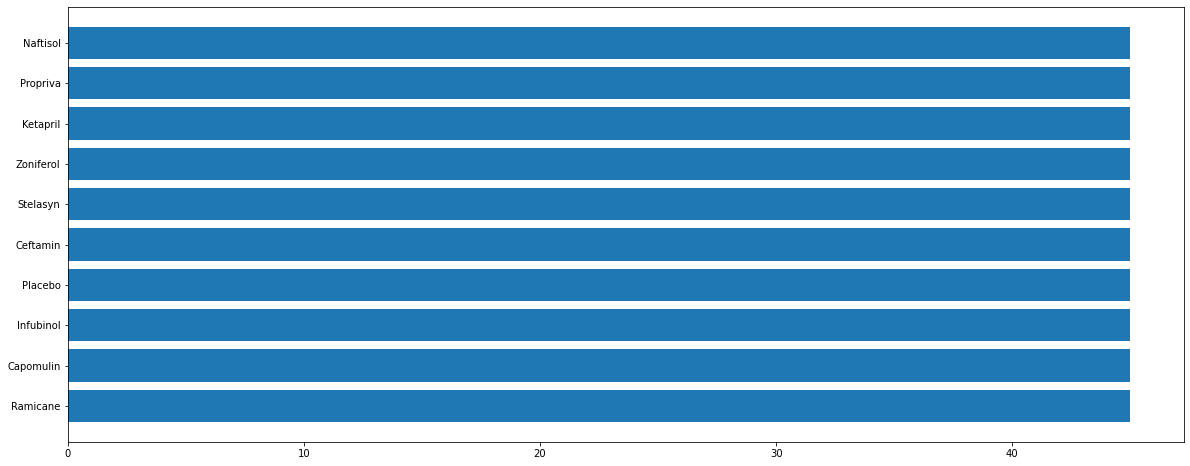

In [21]:
fig, ax = plt.subplots(figsize=(20,8))

ax.barh(study['Drug Regimen'],study['Timepoint'])

<AxesSubplot:>

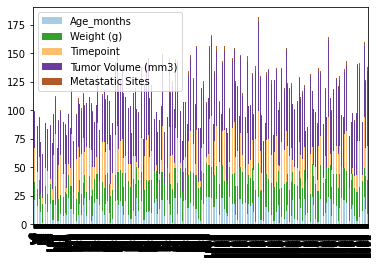

In [22]:
study.plot(kind='bar', stacked=True, colormap='Paired')

In [23]:
plt.show()

#colors = dict('Drug Regimen'(['Naftisol','Propriva','Ketapril','Zoniferol','Stelasyn','Ceftamin','Placebo','Infubinol','Capomulin','Ramicane'],['#adb0ff','#ffb3ff','#90d595','#e48381','#aafbff','#f7bb5f','#e0e0e0','#eafb50','#99ccff','#ffff99']))

In [24]:
bar = study.groupby('Drub Regimen').count()['Mouse ID']

ax.bar("Drug Regimen","Tumor Volume (mm3)")
ax.set_title('Mice Tumors by Treatments')

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.


KeyError: 'Drub Regimen'

In [112]:

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


## Pie Plots

In [ ]:


# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:


# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:


# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:


# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

